In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [2]:
df_hapiness = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report.csv")
df_hapiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
df_hapiness_2021 = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report-2021.csv")
df_hapiness_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df_hapiness.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [5]:
df_hapiness_2021.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [6]:
print("====== Null Percentage on df_hapiness ======")
df_hapiness.isnull().sum()*100/len(df_hapiness)

====== Null Percentage on df_hapiness ======


Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  1.847101
Social support                      0.667009
Healthy life expectancy at birth    2.821960
Freedom to make life choices        1.641868
Generosity                          4.566444
Perceptions of corruption           5.643920
Positive affect                     1.128784
Negative affect                     0.820934
dtype: float64

Let's fill all the missing values to 0

In [7]:
df_hapiness.fillna(0,inplace= True)

In [8]:
print("====== Null Percentage on df_hapiness_2021 ======")
df_hapiness_2021.isnull().sum()*100/len(df_hapiness_2021)

====== Null Percentage on df_hapiness_2021 ======


Country name                                  0.0
Regional indicator                            0.0
Ladder score                                  0.0
Standard error of ladder score                0.0
upperwhisker                                  0.0
lowerwhisker                                  0.0
Logged GDP per capita                         0.0
Social support                                0.0
Healthy life expectancy                       0.0
Freedom to make life choices                  0.0
Generosity                                    0.0
Perceptions of corruption                     0.0
Ladder score in Dystopia                      0.0
Explained by: Log GDP per capita              0.0
Explained by: Social support                  0.0
Explained by: Healthy life expectancy         0.0
Explained by: Freedom to make life choices    0.0
Explained by: Generosity                      0.0
Explained by: Perceptions of corruption       0.0
Dystopia + residual                           0.0


# Data Understanding

Life Ladder - It's a range from 0 to 10 where 0 represents the worst possible life while 10 stands for the "perfect life".

GDP per capita - It indicates a country's economic by its population. In other words, it's known as a country's standard of living based on its economy.

Social support - Perception of available assistance among people, involving a network of a family and friends. It's also related to psychological health

Healthy life expectancy at birth - It's the average life in good health that a person could expect to live

Freedom to make life choices - Concerns to someone's autonomy according to a will or preference.

Generosity - Refers to an overall spirit of kindness. It can involve offering time, assets or talents to aid someone in need.

Perceptions of corruption - Perceived levels of public sector corruption, as determined by expert assessments and opinion surveys

In [9]:
df_hapiness.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,2013.216008,5.466705,9.195408,0.807132,61.571398,0.730366,0.000099,0.704958,0.701989,0.266340
std,4.166828,1.115711,1.702742,0.135355,12.843519,0.169611,0.158466,0.250322,0.130268,0.088213
min,2005.000000,2.375000,0.000000,0.000000,0.000000,0.000000,-0.335000,0.000000,0.000000,0.000000
25%,2010.000000,4.640000,8.397000,0.747000,57.500000,0.642000,-0.106000,0.654000,0.622000,0.206000
50%,2013.000000,5.386000,9.443000,0.834000,65.000000,0.759000,-0.016000,0.793000,0.718000,0.257000
75%,2017.000000,6.283000,10.335000,0.905000,68.400000,0.854000,0.085000,0.868000,0.798000,0.319000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [10]:
df_hapiness_2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


# Global Analysis

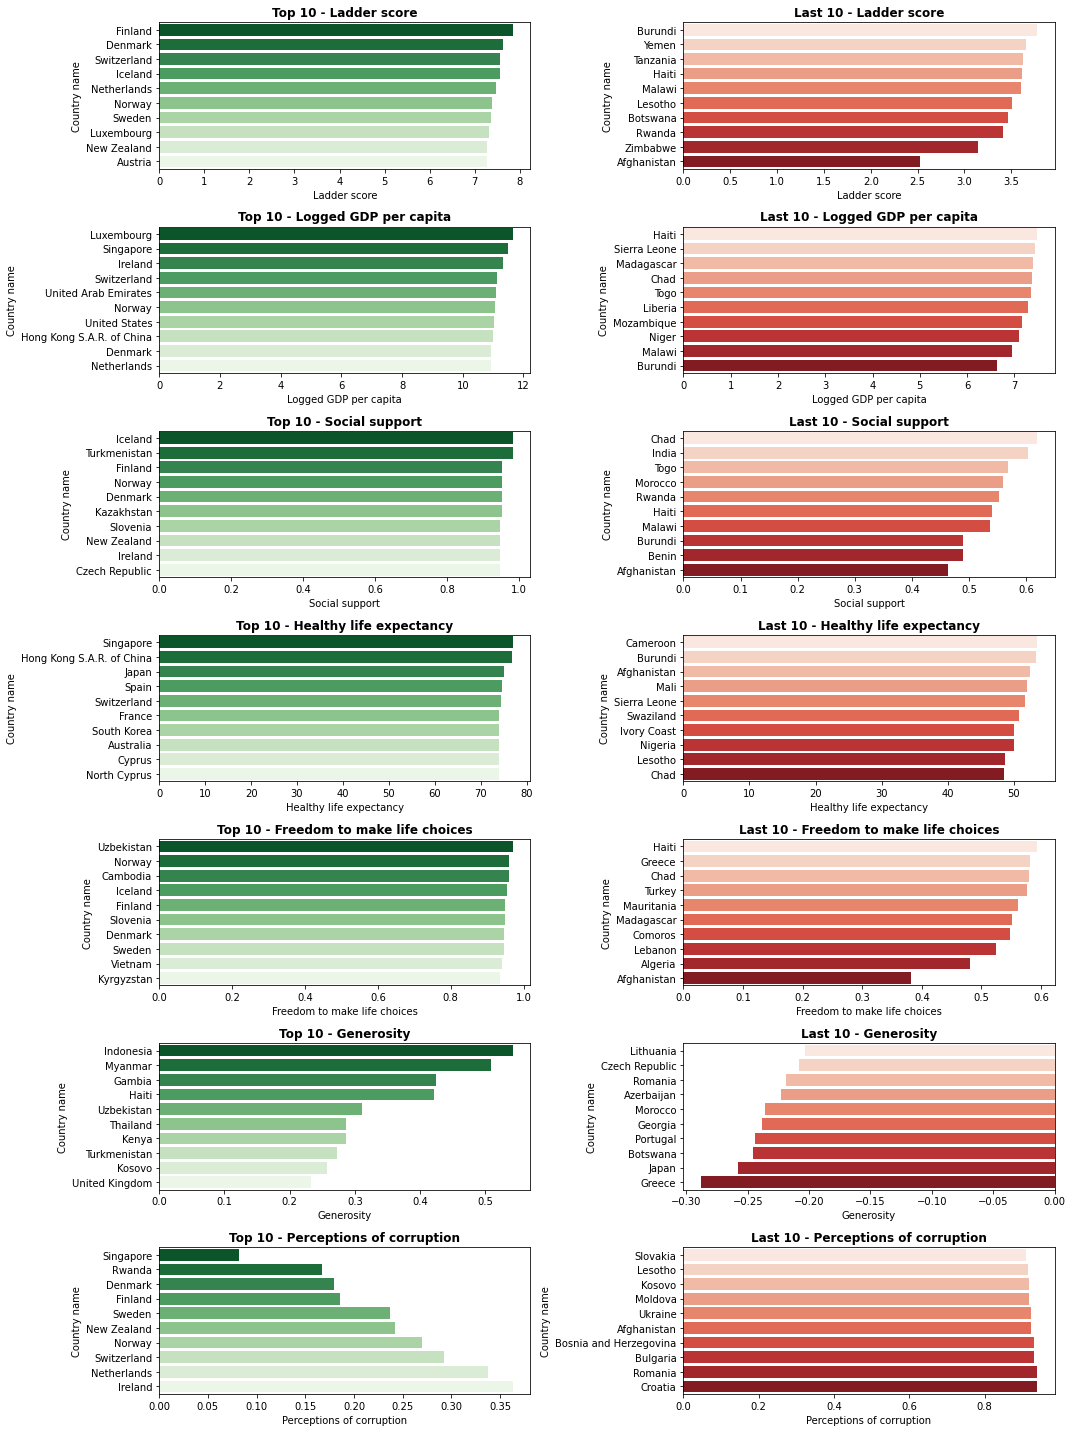

In [11]:
figure, axes = plt.subplots(7,2,figsize=(15,20))


sns.barplot(data=df_hapiness_2021.sort_values(by="Ladder score", ascending=False).head(10), 
            x="Ladder score", y="Country name", palette="Greens_r", ax=axes[0,0]).set_title("Top 10 - Ladder score", fontweight="bold")
sns.barplot(data=df_hapiness_2021.sort_values(by="Ladder score", ascending=False).tail(10), 
            x="Ladder score", y="Country name", palette="Reds", ax=axes[0,1]).set_title("Last 10 - Ladder score", fontweight="bold")

sns.barplot(data=df_hapiness_2021.sort_values(by="Logged GDP per capita", ascending=False).head(10), 
            x="Logged GDP per capita", y="Country name", palette="Greens_r", ax=axes[1,0]).set_title("Top 10 - Logged GDP per capita", fontweight="bold")
sns.barplot(data=df_hapiness_2021.sort_values(by="Logged GDP per capita", ascending=False).tail(10), 
            x="Logged GDP per capita", y="Country name", palette="Reds", ax=axes[1,1]).set_title("Last 10 - Logged GDP per capita", fontweight="bold")

sns.barplot(data=df_hapiness_2021.sort_values(by="Social support", ascending=False).head(10), 
            x="Social support", y="Country name", palette="Greens_r", ax=axes[2,0]).set_title("Top 10 - Social support", fontweight="bold")
sns.barplot(data=df_hapiness_2021.sort_values(by="Social support", ascending=False).tail(10), 
            x="Social support", y="Country name", palette="Reds", ax=axes[2,1]).set_title("Last 10 - Social support", fontweight="bold")

sns.barplot(data=df_hapiness_2021.sort_values(by="Healthy life expectancy", ascending=False).head(10), 
            x="Healthy life expectancy", y="Country name", palette="Greens_r", ax=axes[3,0]).set_title("Top 10 - Healthy life expectancy", fontweight="bold")
sns.barplot(data=df_hapiness_2021.sort_values(by="Healthy life expectancy", ascending=False).tail(10), 
            x="Healthy life expectancy", y="Country name", palette="Reds", ax=axes[3,1]).set_title("Last 10 - Healthy life expectancy", fontweight="bold")

sns.barplot(data=df_hapiness_2021.sort_values(by="Freedom to make life choices", ascending=False).head(10), 
            x="Freedom to make life choices", y="Country name", palette="Greens_r", ax=axes[4,0]).set_title("Top 10 - Freedom to make life choices", fontweight="bold")
sns.barplot(data=df_hapiness_2021.sort_values(by="Freedom to make life choices", ascending=False).tail(10), 
            x="Freedom to make life choices", y="Country name", palette="Reds", ax=axes[4,1]).set_title("Last 10 - Freedom to make life choices", fontweight="bold")

sns.barplot(data=df_hapiness_2021.sort_values(by="Generosity", ascending=False).head(10), 
            x="Generosity", y="Country name", palette="Greens_r", ax=axes[5,0]).set_title("Top 10 - Generosity", fontweight="bold")
sns.barplot(data=df_hapiness_2021.sort_values(by="Generosity", ascending=False).tail(10), 
            x="Generosity", y="Country name", palette="Reds", ax=axes[5,1]).set_title("Last 10 - Generosity", fontweight="bold")

sns.barplot(data=df_hapiness_2021.sort_values(by="Perceptions of corruption", ascending=True).head(10), 
            x="Perceptions of corruption", y="Country name", palette="Greens_r", ax=axes[6,0]).set_title("Top 10 - Perceptions of corruption", fontweight="bold")
sns.barplot(data=df_hapiness_2021.sort_values(by="Perceptions of corruption", ascending=True).tail(10), 
            x="Perceptions of corruption", y="Country name", palette="Reds", ax=axes[6,1]).set_title("Last 10 - Perceptions of corruption", fontweight="bold")
        
plt.tight_layout()
plt.show()

**Ladder Score**:
- As we can see, the top 10 Happiest countires are mostly in Europe while the 10 Saddest are some in Sub Saharan Africa, some in South Asia, Caribbean and Middle East. Finland, Denamark and Switzerland are the top 3.

**Logged GDP per capita**:
- Luxembourg has the higher GDP per capita. United Arab Emirates and Hong Kong/China also stands out at this rank. However, all of the lastest countries are in Sub-Saharan Africa, except for Haiti, which is located in Caribbean.

**Social Support**:
- Iceland is on the top of Social support. Kazakhstan and Turkmenistan (Commonwealth of Idepentent States) have one of the greatest social support indicator. The thing is that, despite of its high populational density, India have one of the worst social support.

**Healthy life expectancy**:
- Singapore and Hong Kong/China are almost tied on Healthy life expectancy (around 77 y.o.). it's seen that the best healthy life expectancy are mixed between Europe and Asia. People in Chad live around only 48 y.o. and Afghaninstan is in this range as well.

**Freedom to make life choices**:
- Uzbekistan, Norway and Cambodia have the highest freedom values while Afghanistan has the lowest one. Greece, Urkey, Lebanon and Algeria are in bad rates too.

**Generosity**:
- Indonesia and Myanmar are the two most generous countries in the World, showing a great difference between the others which is in this rank. Haiti shows up in one of the best too. Greece and Japan have the worst generosity values, followed by Botswana and Portugal.

**Perceptions of corruption**
- Singapore and Rwanda have the lowest values of perception of corruption, which is good. But, Croatia, Romania and Bulgaria have high perception of corruption. These 3 are in Central and Eastern Europe.

Ok, now let's find out which variables are statistically significant with "Ladder Score":

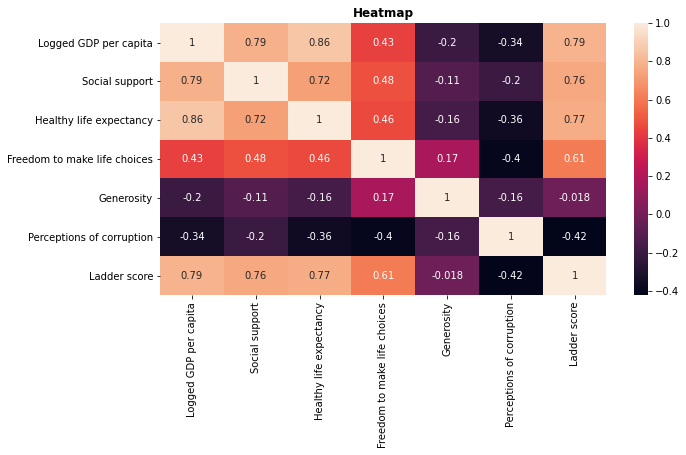

In [12]:
corr = df_hapiness_2021[["Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices","Generosity","Perceptions of corruption", "Ladder score"]].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True)
plt.title("Heatmap", fontweight = "bold")
plt.show()

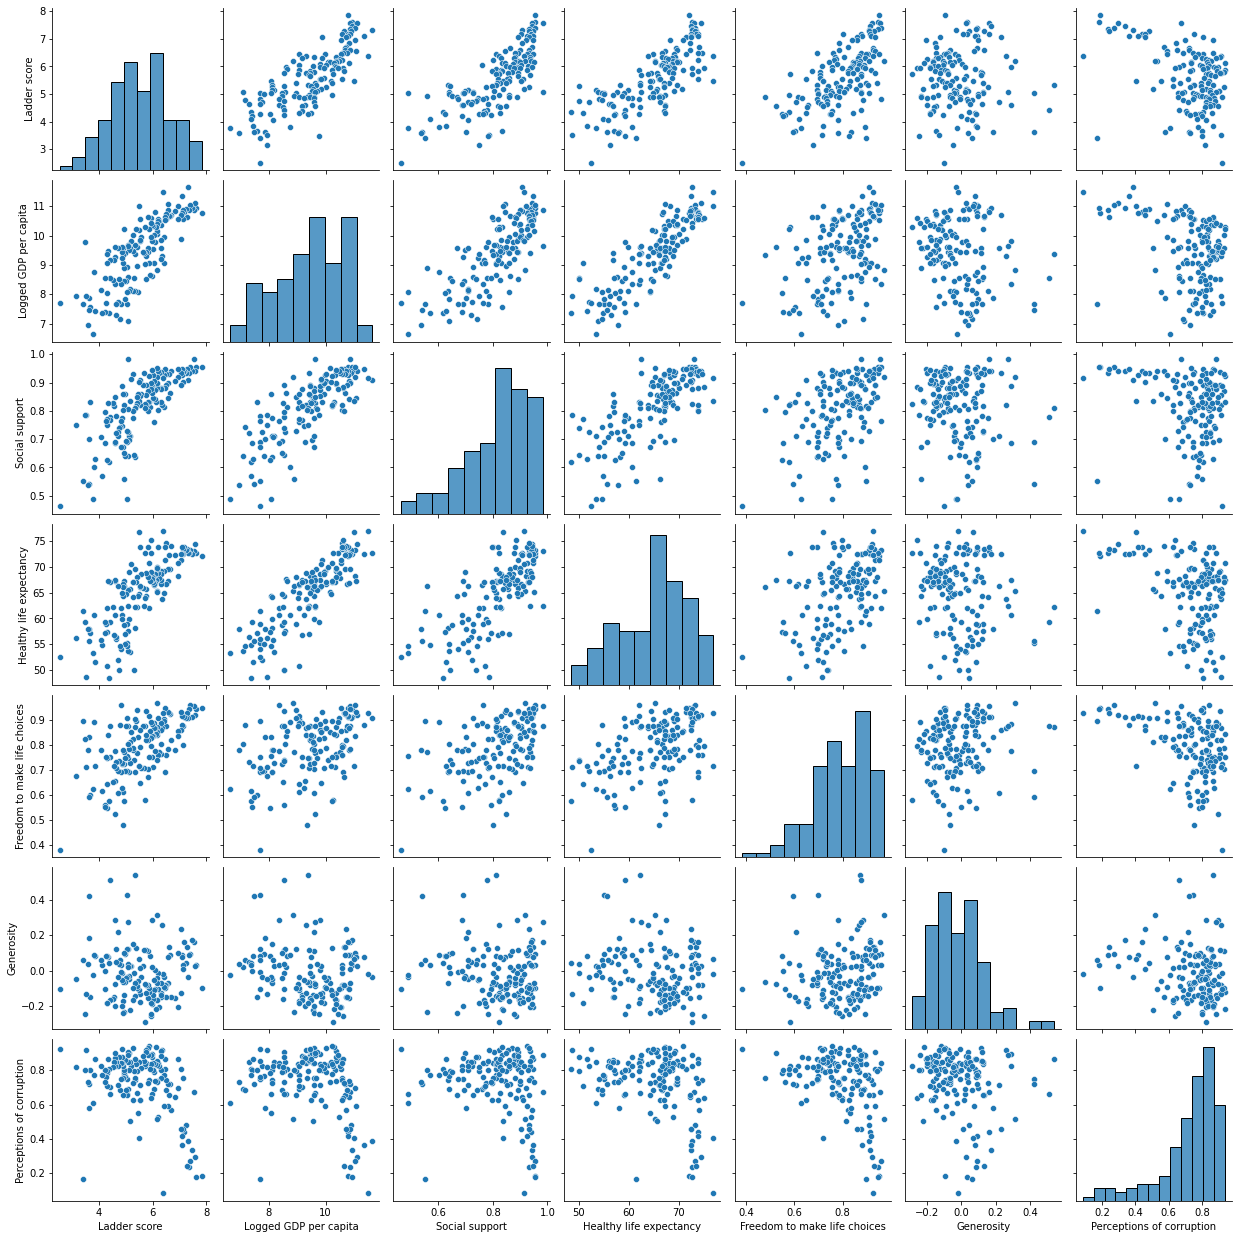

In [13]:
v_vars = ["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", 
          "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

sns.pairplot(data=df_hapiness_2021[v_vars])

plt.show()

GDP per capita, Healthy life expectancy and Social support respectively can clearly explain the overall country's happiness score. It's important to notice the high correlation between GDP per capita and Healthy life expectancy. Obviously, the higher the GDP, the greater are the investments on healthcare systems and as a consequence people live longer.

Let'se take a closer look:

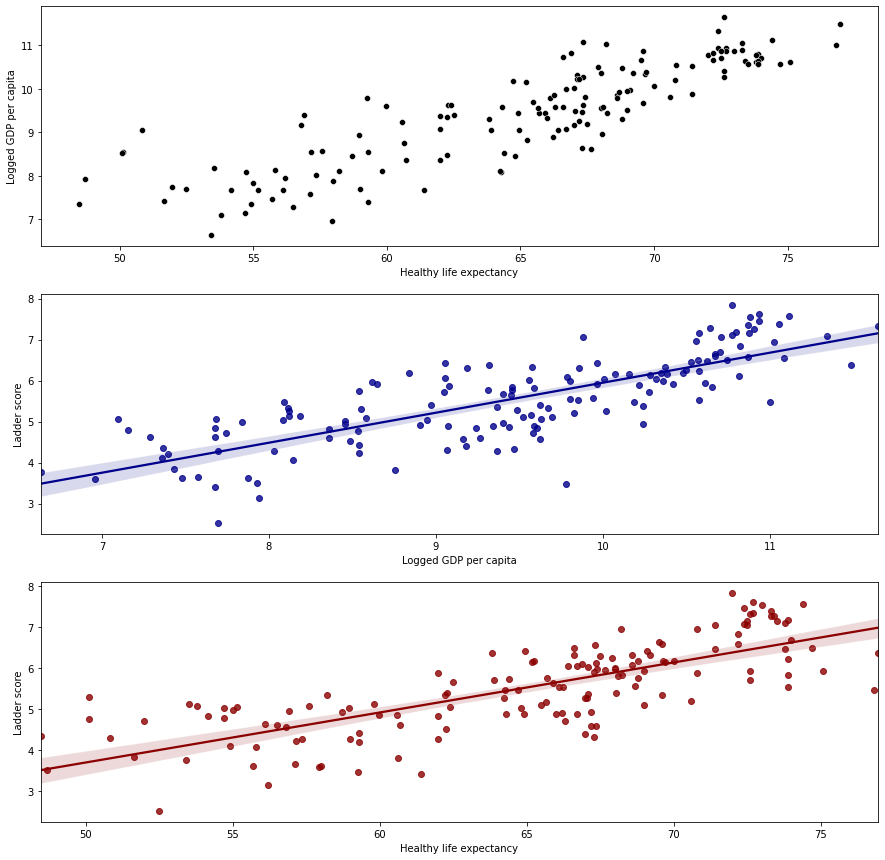

In [14]:
figure, axes = plt.subplots(nrows=3, figsize=(15, 15))

sns.set(style="ticks")
sns.scatterplot(x="Healthy life expectancy", y="Logged GDP per capita", data=df_hapiness_2021, color="black",ax=axes[0])
sns.regplot(x="Logged GDP per capita", y="Ladder score", data=df_hapiness_2021,color="darkblue", ax=axes[1])
sns.regplot(x="Healthy life expectancy", y="Ladder score", data=df_hapiness_2021, color="darkred",ax=axes[2])

plt.show()
plt.close()

**How's Ladder Score according to the Regional Indicator?**

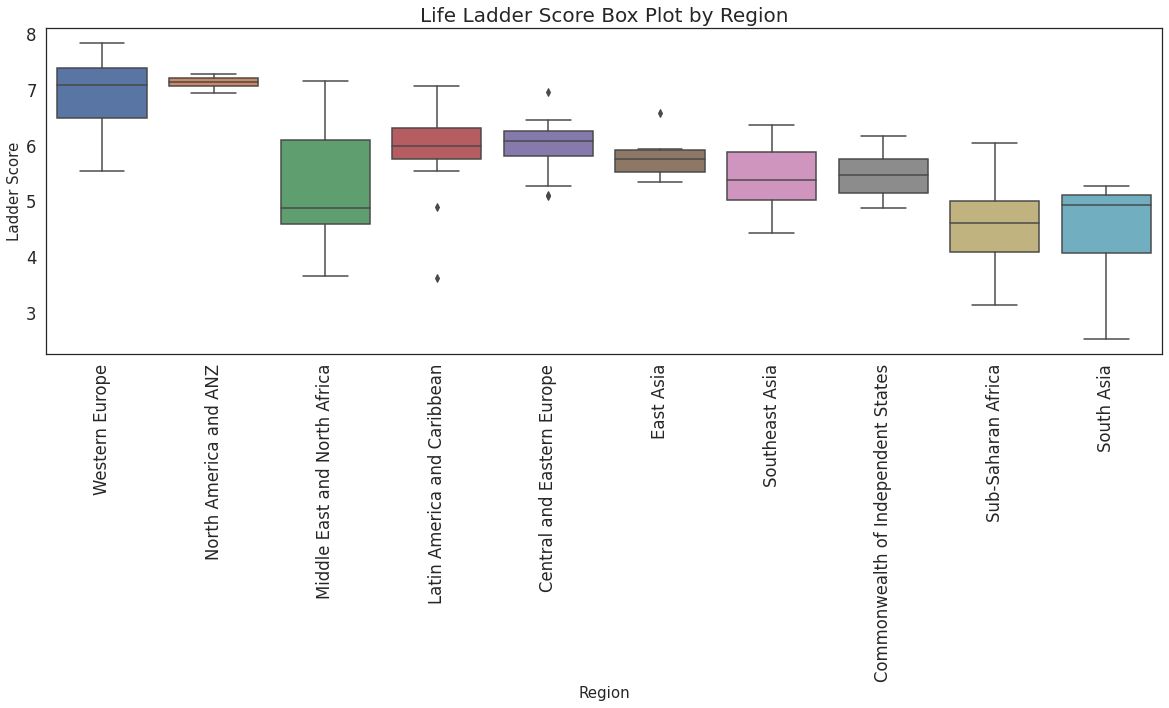

In [15]:
sns.set(style="white", font_scale=1.5)
plt.figure(figsize=(20, 6))

g = sns.boxplot(x="Regional indicator", y="Ladder score", data=df_hapiness_2021)
g.set_xlabel("Region",fontsize=15)
g.set_ylabel("Ladder Score",fontsize=15)

plt.xticks(rotation=90)
plt.title("Life Ladder Score Box Plot by Region", fontsize=20)
plt.show()

- Western Europe and North America & ANZ have the happiest people and this is also visible due to its small variability on ther opinion.

- The saddest people are both in South Asia and Sub-Saharan Africa

- Middle East/North Africa, Sub-Saharan Africa and South Asia have the widest ranges of Ladder Score values (Not considering Latin America/Caribbean outliers)

Creating a categorical variable for Ladder Score based on its range so that we can analyze the "behavioral happiness" along the years:

In [16]:
df_hapiness["Score_Catg"] = np.select(
                            [
                                df_hapiness["Life Ladder"].between(0,4,inclusive=True),
                                df_hapiness["Life Ladder"].between(4,7,inclusive=False),
                                df_hapiness["Life Ladder"].between(7,10,inclusive=True)
                            ],
                            [
                                "Sad",
                                "Normal",
                                "Happy"
                            ]
                        )

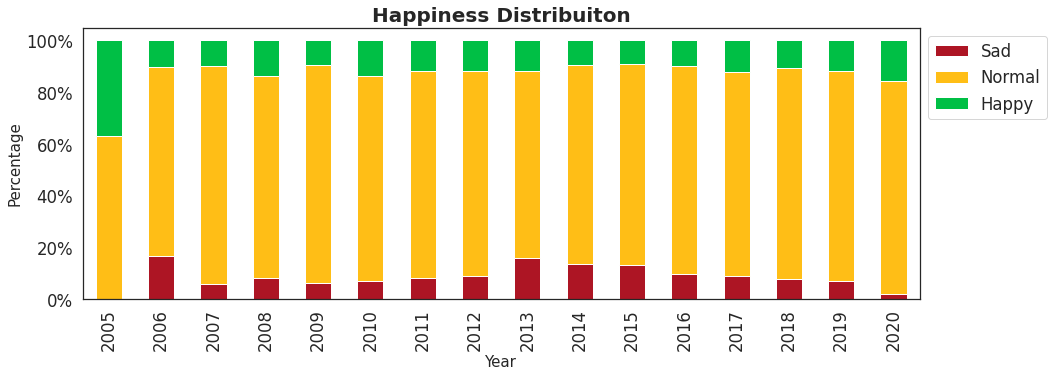

In [17]:
import matplotlib.ticker as mtick

stck = df_hapiness.groupby("year")["Score_Catg"].value_counts(normalize=True).unstack().reset_index().fillna(0)

order = ["year","Sad","Normal","Happy"]

stck = stck.reindex(columns=order)

stck.plot(
            x = "year",
            kind = "bar",
            stacked = True,
            color = ["#AD1524", "#FFBE16", "#00BF45"],
            figsize=(15,5)     
        ).yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Year", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.title("Happiness Distribuiton", fontweight="bold", fontsize=20)

plt.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)

plt.show()


- In 2005, there was no "Sad" Country in the World and around 38% of them were "Happy"!
- Every year, most countries are classified as "Normal".
- The "Sad" percentange decreases between 2019 - 2020, even though the struggle against Covid-19 pandemic.

# Zooming in Brazil

In [18]:
for varname in v_vars:
    
    if varname != "Perceptions of corruption":            
        df_sort = df_hapiness_2021.sort_values(by=varname, ascending=False).reset_index(drop=True) 
        print("== Brazil is on {}th place of {} in the World {} Ranking ==".format(
            df_sort.index[df_sort["Country name"] == "Brazil"].tolist()[0]+1, len(df_sort), varname))
        
        del df_sort
        
    else:
        df_sort = df_hapiness_2021.sort_values(by=varname, ascending=True).reset_index(drop=True)      
        print("== Brazil is on {}th place of {} in the World {} Ranking ==".format(
            df_sort.index[df_sort["Country name"] == "Brazil"].tolist()[0]+1, len(df_sort), varname))
        
        del df_sort


== Brazil is on 35th place of 149 in the World Ladder score Ranking ==
== Brazil is on 74th place of 149 in the World Logged GDP per capita Ranking ==
== Brazil is on 52th place of 149 in the World Social support Ranking ==
== Brazil is on 76th place of 149 in the World Healthy life expectancy Ranking ==
== Brazil is on 75th place of 149 in the World Freedom to make life choices Ranking ==
== Brazil is on 89th place of 149 in the World Generosity Ranking ==
== Brazil is on 68th place of 149 in the World Perceptions of corruption Ranking ==


The worst indicator in Brazil is Generosity, followed by Healthy life expectancy and Freedom to make life choices.

Brazil's Life Ladder (6.330) is above the 75 Percentile, so we can consider this value as a great one!

In [19]:
#Renaming columns
df_hapiness_2021.rename(columns={"Ladder score": "Life Ladder", "Logged GDP per capita": "Log GDP per capita",
                                "Healthy life expectancy": "Healthy life expectancy at birth"
                                }, inplace=True)

#Adding year
df_hapiness_2021["year"] = 2021

col = ["Country name", "year", "Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
      "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

df_hapiness_2021_v2 = df_hapiness_2021[col]
df_hapiness_v2 = df_hapiness[col]

#Appending both datasets 
df_all = pd.concat([df_hapiness_v2, df_hapiness_2021_v2])

#Separates Brazil from the others
df_all["View"] = np.where(df_all["Country name"]=="Brazil","Brazil","World")


In [20]:
df_all[df_all["View"]=="Brazil"]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,View
218,Brazil,2005,6.637,9.438,0.883,63.300,0.882,0.000,0.745,Brazil
219,Brazil,2007,6.321,9.515,0.886,63.780,0.777,-0.016,0.728,Brazil
220,Brazil,2008,6.691,9.555,0.878,64.020,0.782,-0.078,0.688,Brazil
221,Brazil,2009,7.001,9.544,0.913,64.260,0.767,-0.055,0.723,Brazil
222,Brazil,2010,6.837,9.607,0.906,64.500,0.806,-0.054,0.656,Brazil
223,Brazil,2011,7.038,9.637,0.916,64.760,0.834,-0.072,0.662,Brazil
224,Brazil,2012,6.660,9.647,0.890,65.020,0.849,0.000,0.623,Brazil
225,Brazil,2013,7.140,9.668,0.910,65.280,0.785,-0.095,0.707,Brazil
226,Brazil,2014,6.981,9.664,0.898,65.540,0.714,-0.115,0.710,Brazil
227,Brazil,2015,6.547,9.620,0.907,65.800,0.799,-0.016,0.771,Brazil


Well, we can see that Brazil's 2006 Life Score is missing, let's atrribute its value by the average of 2005 and 2007:


In [21]:
newRow = {"Country name":"Brazil", "year":2006, "Life Ladder":np.nan, 
          "Log GDP per capita":np.nan, "Social support": np.nan, "Healthy life expectancy at birth": np.nan,
          "Freedom to make life choices": np.nan, "Generosity": np.nan, "Perceptions of corruption": np.nan,
          "View": "Brazil"}

df_all = df_all.append(newRow, ignore_index=True)

to_fill = ["Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
          "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

for i in to_fill:
        df_all[i] = df_all[i].fillna(
                     df_all[(df_all["Country name"]=="Brazil") & (df_all["year"].isin([2005,2007]))].mean()[i])

In [22]:
#Sorting by year
df_all.sort_values(by="year", inplace=True)
df_all[df_all["View"]=="Brazil"]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,View
218,Brazil,2005,6.637,9.4380,0.8830,63.300,0.8820,0.000,0.7450,Brazil
2098,Brazil,2006,6.479,9.4765,0.8845,63.540,0.8295,-0.008,0.7365,Brazil
219,Brazil,2007,6.321,9.5150,0.8860,63.780,0.7770,-0.016,0.7280,Brazil
220,Brazil,2008,6.691,9.5550,0.8780,64.020,0.7820,-0.078,0.6880,Brazil
221,Brazil,2009,7.001,9.5440,0.9130,64.260,0.7670,-0.055,0.7230,Brazil
222,Brazil,2010,6.837,9.6070,0.9060,64.500,0.8060,-0.054,0.6560,Brazil
223,Brazil,2011,7.038,9.6370,0.9160,64.760,0.8340,-0.072,0.6620,Brazil
224,Brazil,2012,6.660,9.6470,0.8900,65.020,0.8490,0.000,0.6230,Brazil
225,Brazil,2013,7.140,9.6680,0.9100,65.280,0.7850,-0.095,0.7070,Brazil
226,Brazil,2014,6.981,9.6640,0.8980,65.540,0.7140,-0.115,0.7100,Brazil


In [23]:
#In order to plot the features along years, let's get the average of our numerical variables and then group by year and View
df_plt = df_all.groupby(["year", "View"], as_index=False).mean()
df_plt.head()

,year,View,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,2005,Brazil,6.637000,9.438000,0.883000,63.300000,0.882000,0.000000,0.745000
1,2005,World,6.438923,10.144846,0.897962,67.150000,0.763692,0.009846,0.659692
2,2006,Brazil,6.479000,9.476500,0.884500,63.540000,0.829500,-0.008000,0.736500
3,2006,World,5.196899,8.942663,0.835809,59.471685,0.705854,0.006056,0.704798
4,2007,Brazil,6.321000,9.515000,0.886000,63.780000,0.777000,-0.016000,0.728000


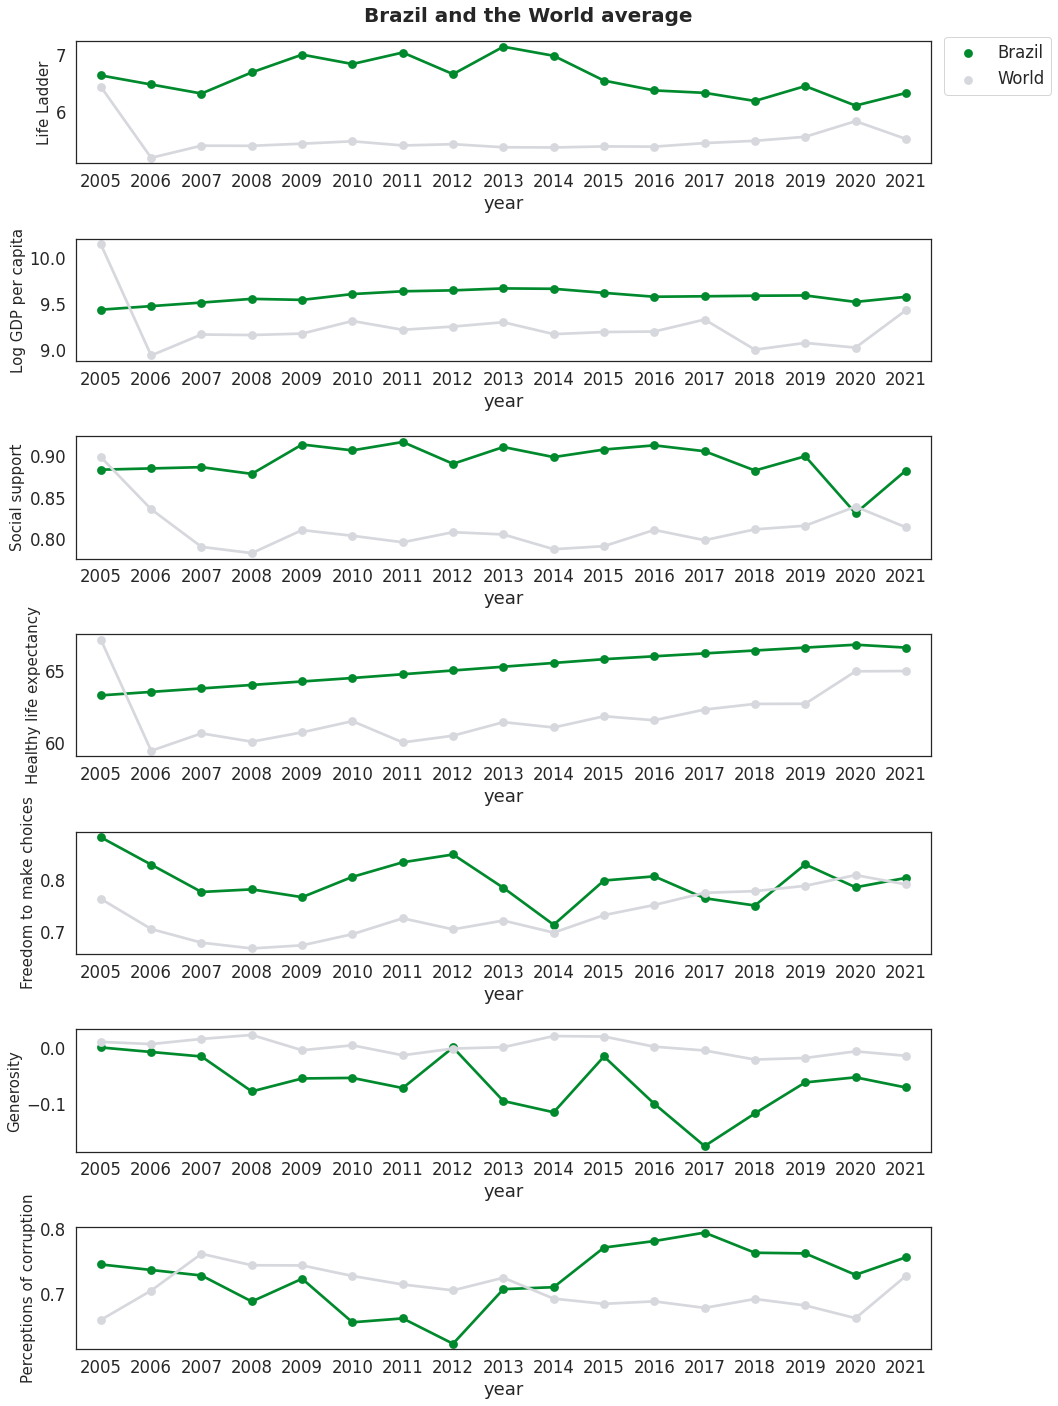

In [24]:
figure, axes = plt.subplots(nrows=7, figsize=(15,20))

figure.suptitle("Brazil and the World average",fontweight="bold", fontsize=20)

palette = {c:"#008A2D" if c=="Brazil" else "#D6D8DD" for c in df_plt["View"].unique()}

sns.pointplot(x="year", y="Life Ladder", data=df_plt, hue="View", palette=palette, ax=axes[0])
sns.pointplot(x="year", y="Log GDP per capita", data=df_plt, hue="View", palette=palette, ax=axes[1])
sns.pointplot(x="year", y="Social support", data=df_plt, hue="View", palette=palette, ax=axes[2])
sns.pointplot(x="year", y="Healthy life expectancy at birth", data=df_plt, hue="View", palette=palette, ax=axes[3])
sns.pointplot(x="year", y="Freedom to make life choices", data=df_plt, hue="View", palette=palette, ax=axes[4])
sns.pointplot(x="year", y="Generosity", data=df_plt, hue="View", palette=palette, ax=axes[5])
sns.pointplot(x="year", y="Perceptions of corruption", data=df_plt, hue="View", palette=palette, ax=axes[6])

axes[0].set_ylabel("Life Ladder",fontsize=15)
axes[1].set_ylabel("Log GDP per capita",fontsize=15)
axes[2].set_ylabel("Social support",fontsize=15)
axes[3].set_ylabel("Healthy life expectancy",fontsize=15)
axes[4].set_ylabel("Freedom to make choices",fontsize=15)
axes[5].set_ylabel("Generosity",fontsize=15)
axes[6].set_ylabel("Perceptions of corruption",fontsize=15)



#Removing each subplot legend except for the first subplot
for k in range(7):
    if k == 0:
        axes[k].legend(loc="upper right", bbox_to_anchor=(1.15,1.1), ncol=1) #Legend position
    else:
        axes[k].get_legend().remove()

plt.tight_layout()
plt.show()

Brazil's Life Ladder Score decreases from 2014 on. But, it's still above the World average. Currently, it's showing a little sign of increasing.

Our GDP per capita has remained constant over the past few years. We can observe a little decrease between 2019 and 2020. This was certainly affected by Covid-19.

Social support suffered a high decrease in 2020, that's also explained by the Covid-19 pandemic.

Healthy life expectancy was slightly increasing but in 2021 it has been a little lower than in 2020.

Brazil's Freedom to make life choices has an unstable behaviour. On Generosity, Brazil is below the World average, what is bad.

Since 2014, Brazil has been on a high level on Perceptions of corruption, overcoming the World average.



# Comparison between South America's Countries

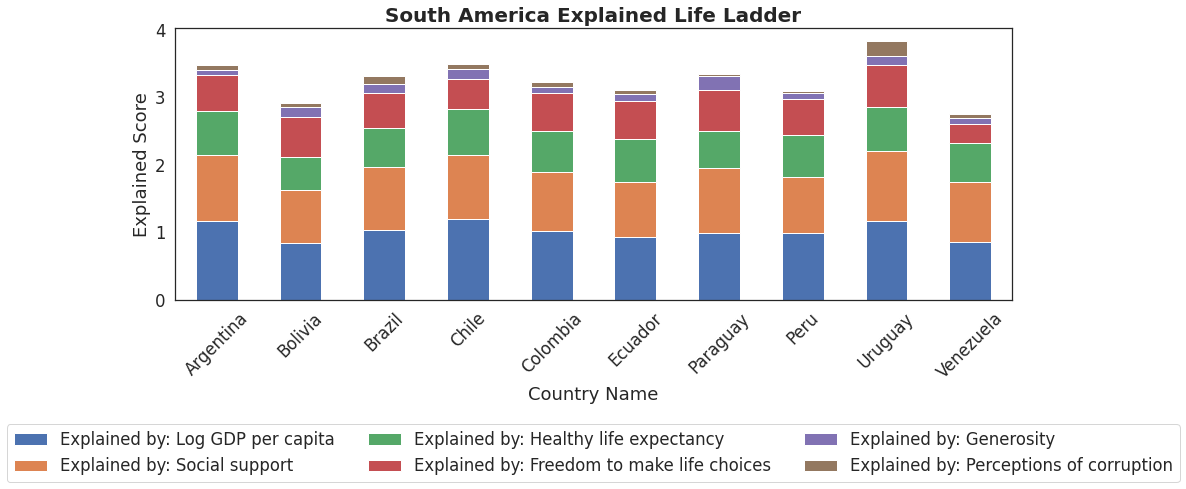

In [25]:
south_america = df_hapiness_2021[df_hapiness_2021["Country name"].isin(
                                                                    ["Argentina" ,"Bolivia" ,"Brazil" ,"Chile" ,
                                                                     "Colombia" ,"Ecuador" ,"Paraguay" ,"Peru" ,
                                                                     "Uruguay" ,"Venezuela"]
                                                                  )].sort_values(by="Country name").drop(["Regional indicator", "Life Ladder",
                                                                     "Standard error of ladder score", "upperwhisker", "lowerwhisker",
                                                                     "Log GDP per capita", "Social support",
                                                                     "Healthy life expectancy at birth", "Freedom to make life choices",
                                                                     "Generosity", "Perceptions of corruption", "Ladder score in Dystopia",
                                                                    "Dystopia + residual", "year"], axis=1)



south_america.plot(
            x = "Country name",
            kind = "bar",
            stacked = True,
            figsize=(15,5)     
        )

plt.title("South America Explained Life Ladder", fontweight="bold", fontsize=20)
plt.ylabel("Explained Score") 
plt.xlabel("Country Name") 
plt.xticks(rotation=45)

plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.7), ncol=3)

plt.show()

Firstly, we can easily notice that the explained features on Life Ladder are kinda balanced all over South America, with some caveats to consider:

- Our Life Ladder scores are mainly explained by GDP per capita and Social Support.

- Uruguay's Perception of corruption outstands among other countries, this is because they have the lowest rate of corruption in South America. Otherwise, we can't conclude the same for Peru and Paraguay, which have the highest values.

- About Generosity, the most prominent is Paraguay.

- Venezuela is the least free to make life choices.

- Bolivia has the lowest Healty life expectancy and GDP per capita values in South America.

- Argentina, Chile and Uruguay are leadding GDP per capita.
